In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as plotter
from scipy.constants import k as BoltzmanConstant
# Initial parameters

cities=10# total number of cities to be traversed


# coordinates for cities picked at random
x =np.random.randint(0,10,size=cities)
y = np.random.randint(0,10,size=cities)

# fixed names of the cities...goes city no 1, city no 2 , .... etc
geography={}
for i in range(cities):
  geography[i]=(x[i],y[i])

T=36 # temp is cut off at 0
decreasing_rate=.8 
total_iterations=1000

# initial solution
current_iteranary= np.random.choice(cities, size=cities, replace=False)


def plot_cities(iteranary):
  temp_x=['None']*(cities+1)
  temp_y=['None']*(cities+1)
 
  L=len(iteranary)
  
  for i in range(L):
    point=geography[iteranary[i]]
    temp_x[i]=point[0]
    temp_y[i]=point[1]

  temp_x[-1]=temp_x[0]
  temp_y[-1]=temp_y[0]
  
  plt.plot(temp_x,temp_y,'-ok')

def costfuction(iteranary): # also can do cost of a segment
  L = len(iteranary)
  d=0
  for i in range(L-1):
    a=[x[iteranary[i]],y[iteranary[i]]]
    b=[x[iteranary[i+1]],y[iteranary[i+1]]]
    d+= np.linalg.norm(np.array(a)-np.array(b))
  
  # distance from the last city to the first city
  a=[x[iteranary[-1]],y[iteranary[-1]]]
  b=[ x[iteranary[0]],y[iteranary[0]]]
  d+=np.linalg.norm(np.array(a)-np.array(b))

  return d

# this function gives a neighbour
def get_neighbour(iteranary): 
  L=len(iteranary)
  neighbour=np.arange(L)
  i=np.random.randint(0,cities)
  j=(i+1)%L

  for i in range(L):
    neighbour[i]=iteranary[i]
 
  temp=neighbour[i]
  neighbour[i]=neighbour[j]
  neighbour[j]=temp
  return neighbour

def decrease_temprature(T, choice, INDEX):
  if choice == 0 :
    return decreasing_rate * T
  elif choice == 1:
    return T/1+ np.log(1+INDEX)
  elif choice == 2:
    return T/(1+INDEX* decreasing_rate)

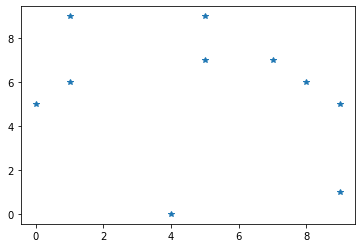

In [ ]:
plt.plot(x,y, '*')

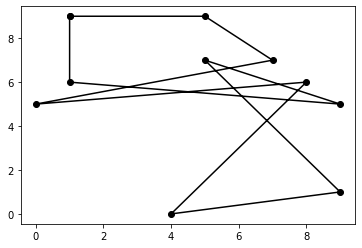

In [ ]:

plot_cities(current_iteranary)


[1 4 5 6 0 2 3 8 9 7] 42.87667305334555


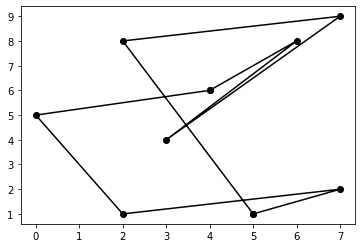

In [ ]:
def annealing(T, current_iteranary, rate, maximum_iteration ,choice_of_cooling):  

  acceptance_score=0
  index=0
  while T>0:
    proposed=get_neighbour(current_iteranary)  # get random neighbour solution 
   
    e=costfuction(current_iteranary)
    e_new=costfuction(proposed)
    
    p=min(np.exp(-e_new-e/(T*BoltzmanConstant)), 1)

    if (e_new<e) or (p> np.random.random()): # accepting with probability
      current_iteranary= proposed
      cost=e_new
      acceptance_score+= 1
    else:
      cost=e
    
    
    #print(acceptance_score, '\t',index)

    T=decrease_temprature(T,choice_of_cooling, index)
    if index > maximum_iteration:
      break
    index+=1

  plot_cities(current_iteranary)

  return current_iteranary, cost


f, cost=annealing(T,current_iteranary, decreasing_rate, total_iterations, choice_of_cooling=0)
print(f, cost)

In [ ]:
"""class annealing():
  rate= .7
  T=None

  def check_acceptance():
    

  def annealing(T):
    self.T=T

  def cooling_schedule(choice, T):
    if choice == 0:
      return self.T * rate
    elif choice == 1:
      return self.T/ 

  def annealing(self):  
    while T>0:   
    proposed= get_neighbour(current_iteranary)  # get random neighbour solution 
    e=costfuction(current_iteranary)
    e_new=costfuction(proposed)
  
    if e_new<e:
      current_iteranary= proposed
      cost=e_new
    else:
      p=np.exp(-(e-e_new)/T , dtype=np.float128)             # accepting with probability
      p= min(p,1)
      some_value=np.random.random(size=1)
      if  p>some_value :
        current_iteranary= proposed
        cost=e_new
      else:
        cost=e
    # some value revert  

    
   T=T* rate
  plot_cities(current_iteranary)

  return current_iteranary, cost"""